### Plot the number of MAGs for various quality

Near complete: 90% completeness and 5% contamination\
Higher quality: 70% completeness and 10% contamination\
Medium quality: 50% completeness and 10% contamination

In [277]:
import pandas as pd
import matplotlib.pyplot as plt
colors = ['#104e8b', '#1f77b4', '#aec7e8']

mags_counts = pd.read_csv('/home/yazhini/work/binning_benchmarking/performance_results.csv', header=0, sep='\t')
mags_counts.index = mags_counts['Tools']
mags_counts = mags_counts.iloc[::-1]

    

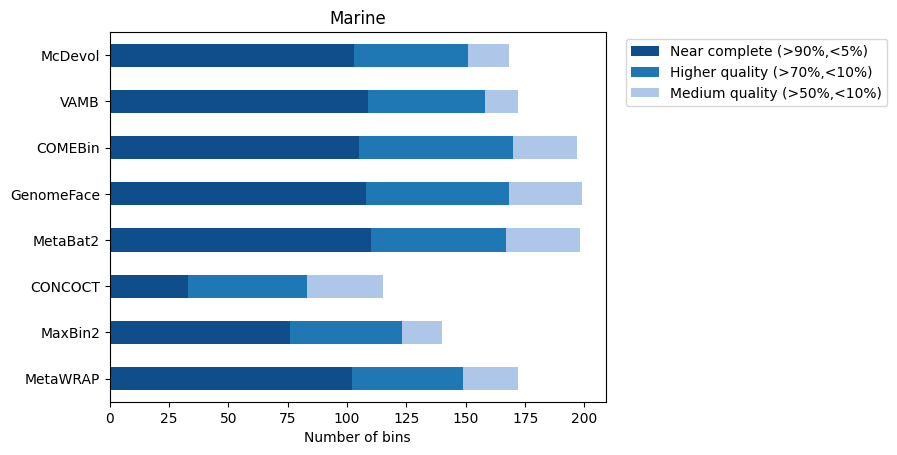

In [279]:
# Pooled assembly
ma_pooled = mags_counts.loc[mags_counts['Dataset']=='marine pooled']

plot_data = ma_pooled[['Near-complete (90%-5%)', 'Higher', 'Medium']]
colors = ['#104e8b', '#1f77b4', '#aec7e8']
plot_data.plot.barh(stacked=True, color=colors)
plt.title('Marine')
plt.xlabel('bin counts')
plt.legend(['Near complete (>90%,<5%)','Higher quality (>70%,<10%)', 'Medium quality (>50%,<10%)'], loc=(1.04, 0.8))#'', frameon=False)
plt.xlabel('Number of bins')
plt.ylabel('')
plt.savefig('pooled_assembly_marine.png', dpi=600, format='png', bbox_inches='tight')


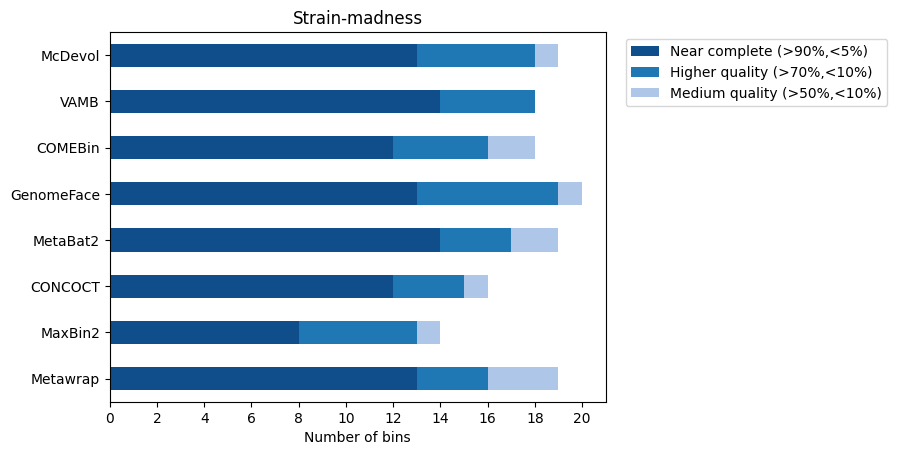

In [177]:

ss_pooled = mags_counts.loc[mags_counts['Dataset']=='strain pooled']

plot_data = ss_pooled[['Near-complete (90%-5%)', 'Higher', 'Medium']]
colors = ['#104e8b', '#1f77b4', '#aec7e8']
plot_data.plot.barh(stacked=True, color=colors)
plt.title('Strain-madness')
plt.xlabel('bin counts')
plt.xticks(range(0,22,2))
plt.legend(['Near complete (>90%,<5%)','Higher quality (>70%,<10%)', 'Medium quality (>50%,<10%)'],loc=(1.04, 0.8))#'', frameon=False)
plt.xlabel('Number of bins')
plt.ylabel('')
plt.savefig('pooled_assembly_strain.png', dpi=600, format='png', bbox_inches='tight')

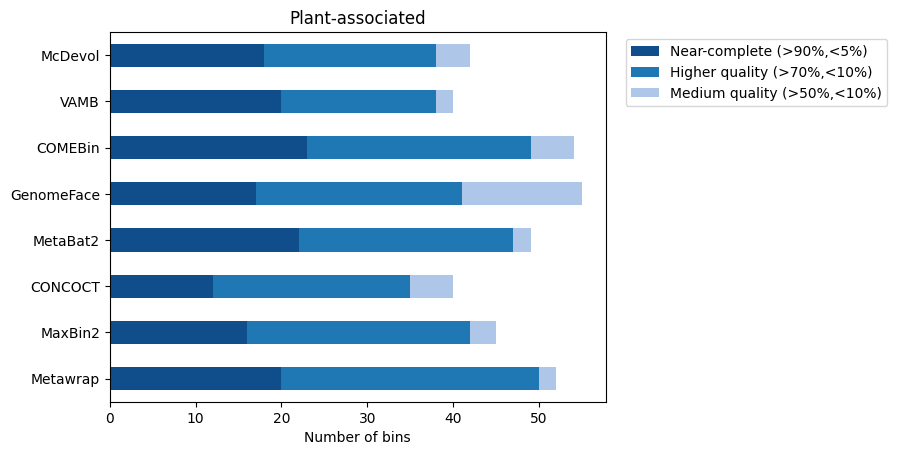

In [176]:
pl_pooled = mags_counts.loc[mags_counts['Dataset']=='plant pooled']

plot_data = pl_pooled[['Near-complete (90%-5%)', 'Higher', 'Medium']]
colors = ['#104e8b', '#1f77b4', '#aec7e8']
plot_data.plot.barh(stacked=True, color=colors)
plt.title('Plant-associated')
plt.xlabel('bin counts')
plt.xlabel('Number of bins')
plt.legend(['Near-complete (>90%,<5%)','Higher quality (>70%,<10%)', 'Medium quality (>50%,<10%)'],loc=(1.04, 0.8))#'', frameon=False)
plt.ylabel('')
plt.savefig('pooled_assembly_plant.png', dpi=600, format='png', bbox_inches='tight')

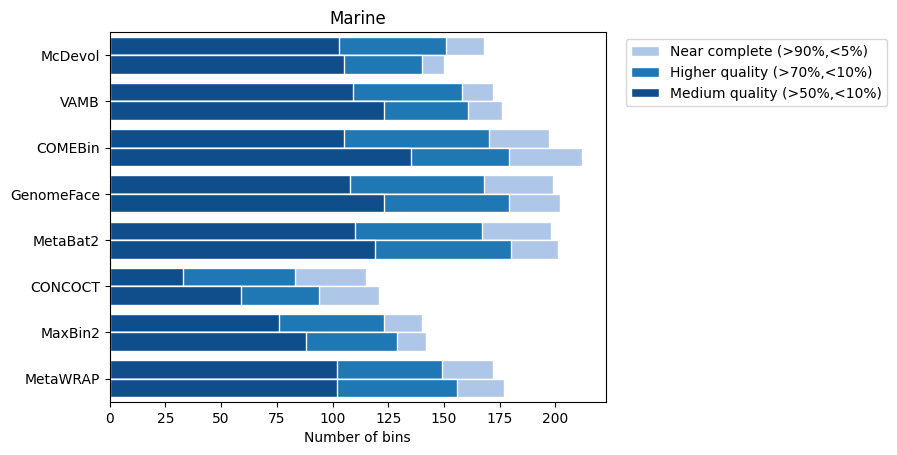

In [216]:
# reassembly
# link: https://stackoverflow.com/questions/59922701/how-can-i-group-a-stacked-bar-chart
import pandas as pd
import matplotlib.pyplot as plt
colors = ['#104e8b', '#1f77b4', '#aec7e8']

mags_counts = pd.read_csv('/home/yazhini/work/binning_benchmarking/pooled_performance_results.csv', header=0, sep='\t')
mags_counts.index = mags_counts['Tools']
mags_counts = mags_counts.iloc[::-1]

mags_counts_ma = mags_counts.loc[mags_counts['Dataset'].str.contains('marine pooled|marine reassembly')]
mags_counts_ma.set_index(['Tools', 'Dataset'], inplace=True)
tools_order = mags_counts_ma.index.get_level_values(0).unique()
mags_counts_maplot = mags_counts_ma.reindex(tools_order, level=0)
mags_counts_maplot = mags_counts_maplot.unstack(level=-1)

fig, ax = plt.subplots()
# (mags_counts_maplot['Near-complete (90%-5%)']+mags_counts_maplot['Higher']+mags_counts_maplot['Medium']).plot(kind='barh', color=[colors[2], colors[2]], width= 0.6, ax=ax)
# (mags_counts_maplot['Near-complete (90%-5%)']+mags_counts_maplot['Higher']).plot(kind='barh', color=[colors[1], colors[1]],width= 0.6, ax=ax)
# (mags_counts_maplot['Near-complete (90%-5%)']).plot(kind='barh', color=[colors[0], colors[0]], width= 0.6,ax=ax)

# plt.legend(['Near complete (>90%,<5%)','Higher quality (>70%,<10%)', 'Medium quality (>50%,<10%)'], loc=(1.04, 0.8))#'', frameon=False)
# plt.title('Marine')
# plt.xlabel('Number of bins')
# plt.ylabel('')
# plt.savefig('pooled_reaassembly_marine.png', dpi=600, format='png', bbox_inches='tight')

# Set bar width and gap size
bar_width = 0.4
bar_gap = 0.05  # Gap between the pairs

# Calculate positions for each bar
y_pos = range(len(mags_counts_maplot))
y_pos_shifted = [pos + bar_width + bar_gap for pos in y_pos]  # Shift positions for the second set

# Plot the stacked bar segments for "marine pooled"
(mags_counts_maplot['Near-complete (90%-5%)']['marine pooled'] +
 mags_counts_maplot['Higher']['marine pooled'] +
 mags_counts_maplot['Medium']['marine pooled']).plot(
    kind='barh', color=colors[2], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_maplot['Near-complete (90%-5%)']['marine pooled'] +
 mags_counts_maplot['Higher']['marine pooled']).plot(
    kind='barh', color=colors[1], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_maplot['Near-complete (90%-5%)']['marine pooled']).plot(
    kind='barh', color=colors[0], width=bar_width, ax=ax, position=0, edgecolor='white')

# Plot the stacked bar segments for "marine reassembly" with shifted positions
(mags_counts_maplot['Near-complete (90%-5%)']['marine reassembly'] +
 mags_counts_maplot['Higher']['marine reassembly'] +
 mags_counts_maplot['Medium']['marine reassembly']).plot(
    kind='barh', color=colors[2], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_maplot['Near-complete (90%-5%)']['marine reassembly'] +
 mags_counts_maplot['Higher']['marine reassembly']).plot(
    kind='barh', color=colors[1], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_maplot['Near-complete (90%-5%)']['marine reassembly']).plot(
    kind='barh', color=colors[0], width=bar_width, ax=ax, position=1, edgecolor='white')

# Customize plot appearance
plt.legend(['Near complete (>90%,<5%)', 'Higher quality (>70%,<10%)', 'Medium quality (>50%,<10%)'], loc=(1.04, 0.8))
plt.title('Marine')
plt.xlabel('Number of bins')
plt.ylabel('')
plt.ylim(-0.5, 7.5)
# Adjust the layout to ensure all bars are fully visible
# plt.tight_layout(rect=[1, 1, 2, 1.95])  # Adjust the rect parameter to add padding at the top

plt.savefig('pooled_reassembly_marine.png', dpi=600, format='png', bbox_inches='tight')

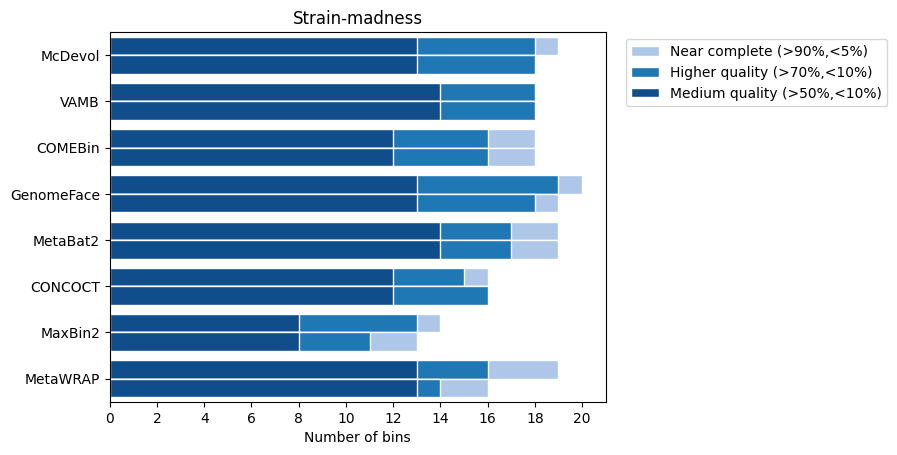

In [217]:
# strain-madness
mags_counts_ss = mags_counts.loc[mags_counts['Dataset'].str.contains('strain pooled|strain reassembly')]
mags_counts_ss.set_index(['Tools', 'Dataset'], inplace=True)
tools_order = mags_counts_ss.index.get_level_values(0).unique()
mags_counts_ssplot = mags_counts_ss.reindex(tools_order, level=0)
mags_counts_ssplot = mags_counts_ssplot.unstack(level=-1)

fig, ax = plt.subplots()
# Set bar width and gap size
bar_width = 0.4
bar_gap = 0.05  # Gap between the pairs

# Calculate positions for each bar
y_pos = range(len(mags_counts_ssplot))
y_pos_shifted = [pos + bar_width + bar_gap for pos in y_pos]  # Shift positions for the second set

# Plot the stacked bar segments for "strain pooled"
(mags_counts_ssplot['Near-complete (90%-5%)']['strain pooled'] +
 mags_counts_ssplot['Higher']['strain pooled'] +
 mags_counts_ssplot['Medium']['strain pooled']).plot(
    kind='barh', color=colors[2], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_ssplot['Near-complete (90%-5%)']['strain pooled'] +
 mags_counts_ssplot['Higher']['strain pooled']).plot(
    kind='barh', color=colors[1], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_ssplot['Near-complete (90%-5%)']['strain pooled']).plot(
    kind='barh', color=colors[0], width=bar_width, ax=ax, position=0, edgecolor='white')

# Plot the stacked bar segments for "strain reassembly" with shifted positions
(mags_counts_ssplot['Near-complete (90%-5%)']['strain reassembly'] +
 mags_counts_ssplot['Higher']['strain reassembly'] +
 mags_counts_ssplot['Medium']['strain reassembly']).plot(
    kind='barh', color=colors[2], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_ssplot['Near-complete (90%-5%)']['strain reassembly'] +
 mags_counts_ssplot['Higher']['strain reassembly']).plot(
    kind='barh', color=colors[1], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_ssplot['Near-complete (90%-5%)']['strain reassembly']).plot(
    kind='barh', color=colors[0], width=bar_width, ax=ax, position=1, edgecolor='white')

# Customize plot appearance
plt.legend(['Near complete (>90%,<5%)', 'Higher quality (>70%,<10%)', 'Medium quality (>50%,<10%)'], loc=(1.04, 0.8))
plt.title('Strain-madness')
plt.xlabel('Number of bins')
plt.ylabel('')
plt.xticks(range(0,22,2))
plt.ylim(-0.5, 7.5)

plt.savefig('pooled_reassembly_strain.png', dpi=600, format='png', bbox_inches='tight')

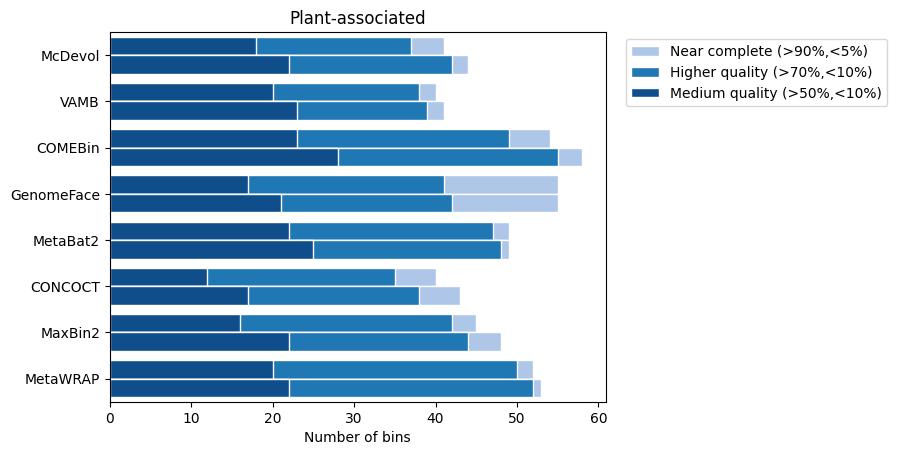

In [218]:
# plant-associated
mags_counts_pl = mags_counts.loc[mags_counts['Dataset'].str.contains('plant pooled|plant reassembly')]
mags_counts_pl.set_index(['Tools', 'Dataset'], inplace=True)
tools_order = mags_counts_pl.index.get_level_values(0).unique()
mags_counts_plplot = mags_counts_pl.reindex(tools_order, level=0)
mags_counts_plplot = mags_counts_plplot.unstack(level=-1)

fig, ax = plt.subplots()
# Set bar width and gap size
bar_width = 0.4
bar_gap = 0.05  # Gap between the pairs

# Calculate positions for each bar
y_pos = range(len(mags_counts_plplot))
y_pos_shifted = [pos + bar_width + bar_gap for pos in y_pos]  # Shift positions for the second set

# Plot the stacked bar segments for "plant pooled"
(mags_counts_plplot['Near-complete (90%-5%)']['plant pooled'] +
 mags_counts_plplot['Higher']['plant pooled'] +
 mags_counts_plplot['Medium']['plant pooled']).plot(
    kind='barh', color=colors[2], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['plant pooled'] +
 mags_counts_plplot['Higher']['plant pooled']).plot(
    kind='barh', color=colors[1], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['plant pooled']).plot(
    kind='barh', color=colors[0], width=bar_width, ax=ax, position=0, edgecolor='white')

# Plot the stacked bar segments for "plant reassembly" with shifted positions
(mags_counts_plplot['Near-complete (90%-5%)']['plant reassembly'] +
 mags_counts_plplot['Higher']['plant reassembly'] +
 mags_counts_plplot['Medium']['plant reassembly']).plot(
    kind='barh', color=colors[2], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['plant reassembly'] +
 mags_counts_plplot['Higher']['plant reassembly']).plot(
    kind='barh', color=colors[1], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['plant reassembly']).plot(
    kind='barh', color=colors[0], width=bar_width, ax=ax, position=1, edgecolor='white')

# Customize plot appearance
plt.legend(['Near complete (>90%,<5%)', 'Higher quality (>70%,<10%)', 'Medium quality (>50%,<10%)'], loc=(1.04, 0.8))
plt.title('Plant-associated')
plt.xlabel('Number of bins')
plt.ylabel('')
plt.ylim(-0.5, 7.5)

plt.savefig('pooled_reassembly_plant.png', dpi=600, format='png', bbox_inches='tight')

### Multisplit binning 

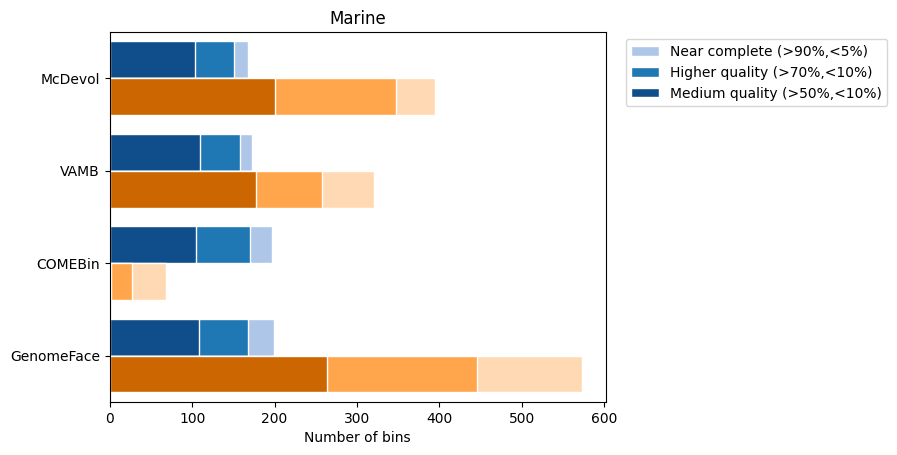

In [210]:
# reassembly
# link: https://stackoverflow.com/questions/59922701/how-can-i-group-a-stacked-bar-chart
import pandas as pd
import matplotlib.pyplot as plt
colors = ['#104e8b', '#1f77b4', '#aec7e8']
colors_ms = ['#cc6600', '#ffa64d', '#ffd9b3']
mags_counts = pd.read_csv('/home/yazhini/work/binning_benchmarking/multisplit_vs_pooled.csv', header=0, sep='\t')
mags_counts.index = mags_counts['Tools']
mags_counts = mags_counts.iloc[::-1]

mags_counts_ma = mags_counts.loc[mags_counts['Dataset'].str.contains('marine pooled|marine multisplit')]
mags_counts_ma.set_index(['Tools', 'Dataset'], inplace=True)
tools_order = mags_counts_ma.index.get_level_values(0).unique()
mags_counts_maplot = mags_counts_ma.reindex(tools_order, level=0)
mags_counts_maplot = mags_counts_maplot.unstack(level=-1)

fig, ax = plt.subplots()

# Set bar width and gap size
bar_width = 0.4
bar_gap = 0.05  # Gap between the pairs

# Calculate positions for each bar
y_pos = range(len(mags_counts_maplot))
y_pos_shifted = [pos + bar_width + bar_gap for pos in y_pos]  # Shift positions for the second set

# Plot the stacked bar segments for "marine pooled"
(mags_counts_maplot['Near-complete (90%-5%)']['marine pooled'] +
 mags_counts_maplot['Higher']['marine pooled'] +
 mags_counts_maplot['Medium']['marine pooled']).plot(
    kind='barh', color=colors[2], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_maplot['Near-complete (90%-5%)']['marine pooled'] +
 mags_counts_maplot['Higher']['marine pooled']).plot(
    kind='barh', color=colors[1], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_maplot['Near-complete (90%-5%)']['marine pooled']).plot(
    kind='barh', color=colors[0], width=bar_width, ax=ax, position=0, edgecolor='white')

# Plot the stacked bar segments for "marine reassembly" with shifted positions
(mags_counts_maplot['Near-complete (90%-5%)']['marine multisplit'] +
 mags_counts_maplot['Higher']['marine multisplit'] +
 mags_counts_maplot['Medium']['marine multisplit']).plot(
    kind='barh', color=colors_ms[2], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_maplot['Near-complete (90%-5%)']['marine multisplit'] +
 mags_counts_maplot['Higher']['marine multisplit']).plot(
    kind='barh', color=colors_ms[1], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_maplot['Near-complete (90%-5%)']['marine multisplit']).plot(
    kind='barh', color=colors_ms[0], width=bar_width, ax=ax, position=1, edgecolor='white')

# Customize plot appearance
plt.legend(['Near complete (>90%,<5%)', 'Higher quality (>70%,<10%)', 'Medium quality (>50%,<10%)'], loc=(1.04, 0.8))
plt.title('Marine')
plt.xlabel('Number of bins')
plt.ylabel('')
plt.ylim(-0.5, 3.5)
# Adjust the layout to ensure all bars are fully visible
# plt.tight_layout(rect=[1, 1, 2, 1.95])  # Adjust the rect parameter to add padding at the top

plt.savefig('pooled_multisplit_marine.png', dpi=600, format='png', bbox_inches='tight')

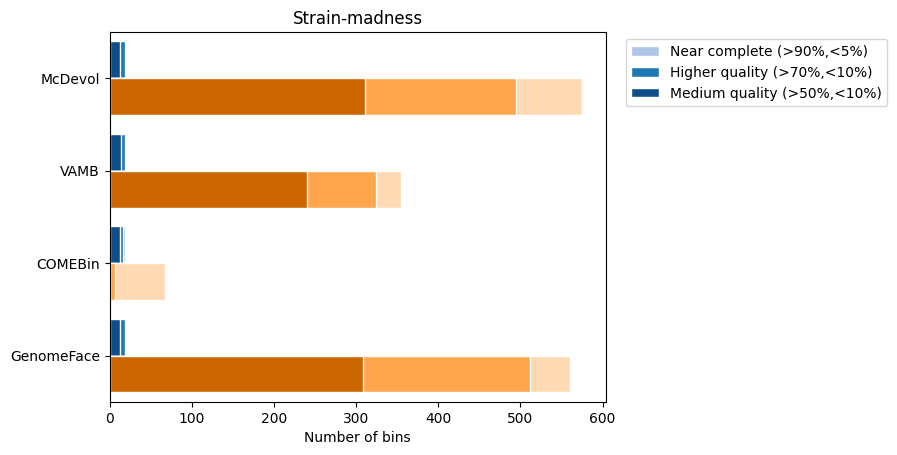

In [211]:
mags_counts_ss = mags_counts.loc[mags_counts['Dataset'].str.contains('strain pooled|strain multisplit')]
mags_counts_ss.set_index(['Tools', 'Dataset'], inplace=True)
tools_order = mags_counts_ss.index.get_level_values(0).unique()
mags_counts_ssplot = mags_counts_ss.reindex(tools_order, level=0)
mags_counts_ssplot = mags_counts_ssplot.unstack(level=-1)

fig, ax = plt.subplots()

# Set bar width and gap size
bar_width = 0.4
bar_gap = 0.05  # Gap between the pairs

# Calculate positions for each bar
y_pos = range(len(mags_counts_ssplot))
y_pos_shifted = [pos + bar_width + bar_gap for pos in y_pos]  # Shift positions for the second set

# Plot the stacked bar segments for "strain pooled"
(mags_counts_ssplot['Near-complete (90%-5%)']['strain pooled'] +
 mags_counts_ssplot['Higher']['strain pooled'] +
 mags_counts_ssplot['Medium']['strain pooled']).plot(
    kind='barh', color=colors[2], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_ssplot['Near-complete (90%-5%)']['strain pooled'] +
 mags_counts_ssplot['Higher']['strain pooled']).plot(
    kind='barh', color=colors[1], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_ssplot['Near-complete (90%-5%)']['strain pooled']).plot(
    kind='barh', color=colors[0], width=bar_width, ax=ax, position=0, edgecolor='white')

# Plot the stacked bar segments for "strain reassembly" with shifted positions
(mags_counts_ssplot['Near-complete (90%-5%)']['strain multisplit'] +
 mags_counts_ssplot['Higher']['strain multisplit'] +
 mags_counts_ssplot['Medium']['strain multisplit']).plot(
    kind='barh', color=colors_ms[2], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_ssplot['Near-complete (90%-5%)']['strain multisplit'] +
 mags_counts_ssplot['Higher']['strain multisplit']).plot(
    kind='barh', color=colors_ms[1], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_ssplot['Near-complete (90%-5%)']['strain multisplit']).plot(
    kind='barh', color=colors_ms[0], width=bar_width, ax=ax, position=1, edgecolor='white')

# Customize plot appearance
plt.legend(['Near complete (>90%,<5%)', 'Higher quality (>70%,<10%)', 'Medium quality (>50%,<10%)'], loc=(1.04, 0.8))
plt.title('Strain-madness')
plt.xlabel('Number of bins')
plt.ylabel('')
plt.ylim(-0.5, 3.5)
# Adjust the layout to ensure all bars are fully visible
# plt.tight_layout(rect=[1, 1, 2, 1.95])  # Adjust the rect parameter to add padding at the top

plt.savefig('pooled_multisplit_strain.png', dpi=600, format='png', bbox_inches='tight')

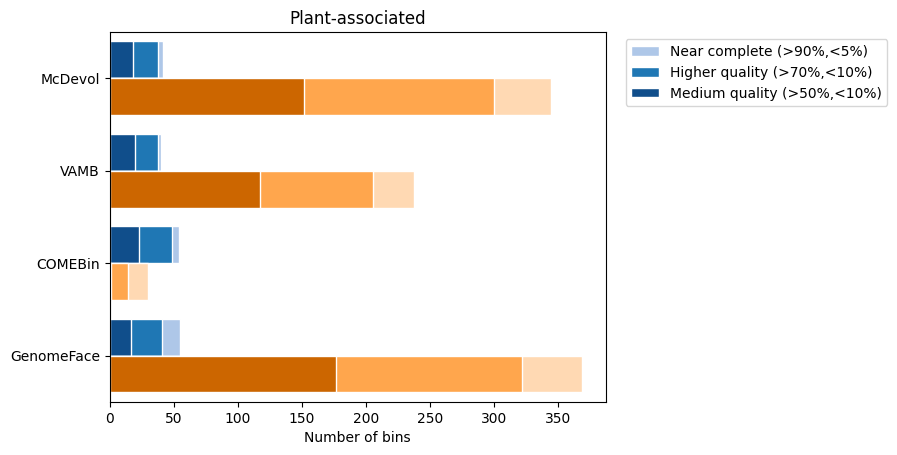

In [207]:
mags_counts_pl = mags_counts.loc[mags_counts['Dataset'].str.contains('plant pooled|plant multisplit')]
mags_counts_pl.set_index(['Tools', 'Dataset'], inplace=True)
tools_order = mags_counts_pl.index.get_level_values(0).unique()
mags_counts_plplot = mags_counts_pl.reindex(tools_order, level=0)
mags_counts_plplot = mags_counts_plplot.unstack(level=-1)

fig, ax = plt.subplots()

# Set bar width and gap size
bar_width = 0.4
bar_gap = 0.05  # Gap between the pairs

# Calculate positions for each bar
y_pos = range(len(mags_counts_plplot))
y_pos_shifted = [pos + bar_width + bar_gap for pos in y_pos]  # Shift positions for the second set

# Plot the stacked bar segments for "plant pooled"
(mags_counts_plplot['Near-complete (90%-5%)']['plant pooled'] +
 mags_counts_plplot['Higher']['plant pooled'] +
 mags_counts_plplot['Medium']['plant pooled']).plot(
    kind='barh', color=colors[2], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['plant pooled'] +
 mags_counts_plplot['Higher']['plant pooled']).plot(
    kind='barh', color=colors[1], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['plant pooled']).plot(
    kind='barh', color=colors[0], width=bar_width, ax=ax, position=0, edgecolor='white')

# Plot the stacked bar segments for "plant reassembly" with shifted positions
(mags_counts_plplot['Near-complete (90%-5%)']['plant multisplit'] +
 mags_counts_plplot['Higher']['plant multisplit'] +
 mags_counts_plplot['Medium']['plant multisplit']).plot(
    kind='barh', color=colors_ms[2], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['plant multisplit'] +
 mags_counts_plplot['Higher']['plant multisplit']).plot(
    kind='barh', color=colors_ms[1], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['plant multisplit']).plot(
    kind='barh', color=colors_ms[0], width=bar_width, ax=ax, position=1, edgecolor='white')

# Customize plot appearance
plt.legend(['Near complete (>90%,<5%)', 'Higher quality (>70%,<10%)', 'Medium quality (>50%,<10%)'], loc=(1.04, 0.8))
plt.title('Plant-associated')
plt.xlabel('Number of bins')
plt.ylabel('')
plt.ylim(-0.5, 3.5)
# Adjust the layout to ensure all bars are fully visible
# plt.tight_layout(rect=[1, 1, 2, 1.95])  # Adjust the rect parameter to add padding at the top

plt.savefig('pooled_multisplit_plant.png', dpi=600, format='png', bbox_inches='tight')

### Gold standard pooled assembly plots

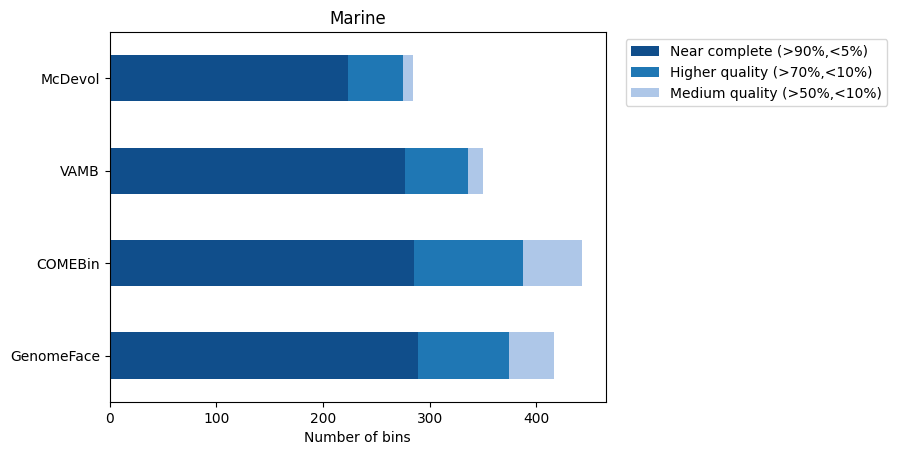

In [183]:
import pandas as pd
import matplotlib.pyplot as plt
colors = ['#104e8b', '#1f77b4', '#aec7e8']

gsmags_counts = pd.read_csv('/home/yazhini/work/binning_benchmarking/goldstandard_pooled_checkm2.csv', header=0, sep='\t')
gsmags_counts.index = gsmags_counts['Tools']
gsmags_counts = gsmags_counts.iloc[::-1]

# Pooled assembly
gsma_pooled = gsmags_counts.loc[gsmags_counts['Dataset']=='Marine']

gsplot_data = gsma_pooled[['Near-complete (90%-5%)', 'Higher', 'Medium']]
colors = ['#104e8b', '#1f77b4', '#aec7e8']
gsplot_data.plot.barh(stacked=True, color=colors)
plt.title('Marine')
plt.xlabel('bin counts')
plt.legend(['Near complete (>90%,<5%)','Higher quality (>70%,<10%)', 'Medium quality (>50%,<10%)'], loc=(1.04, 0.8))#'', frameon=False)
plt.xlabel('Number of bins')
plt.ylabel('')
plt.savefig('gspooled_assembly_marine.png', dpi=600, format='png', bbox_inches='tight')


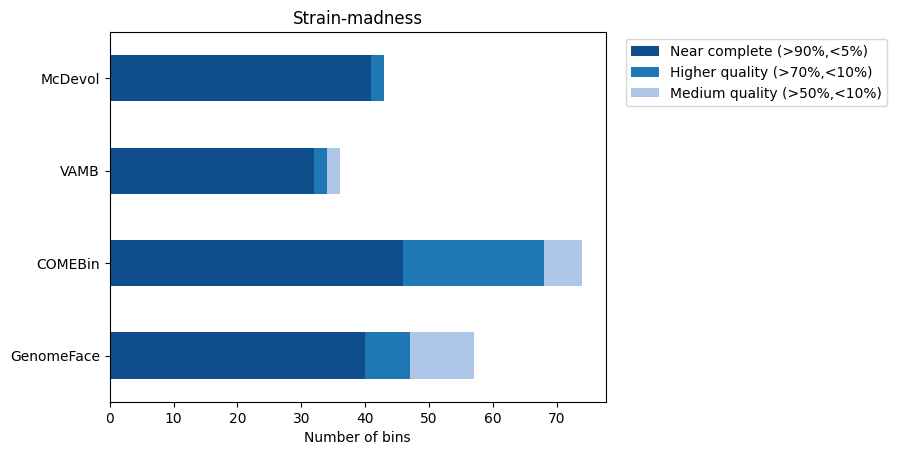

In [187]:
gsss_pooled = gsmags_counts.loc[gsmags_counts['Dataset']=='Strain-madness']

gsplot_data = gsss_pooled[['Near-complete (90%-5%)', 'Higher', 'Medium']]
colors = ['#104e8b', '#1f77b4', '#aec7e8']
gsplot_data.plot.barh(stacked=True, color=colors)
plt.title('Strain-madness')
plt.xlabel('bin counts')
plt.legend(['Near complete (>90%,<5%)','Higher quality (>70%,<10%)', 'Medium quality (>50%,<10%)'], loc=(1.04, 0.8))#'', frameon=False)
plt.xlabel('Number of bins')
plt.ylabel('')
plt.savefig('gspooled_assembly_strain.png', dpi=600, format='png', bbox_inches='tight')

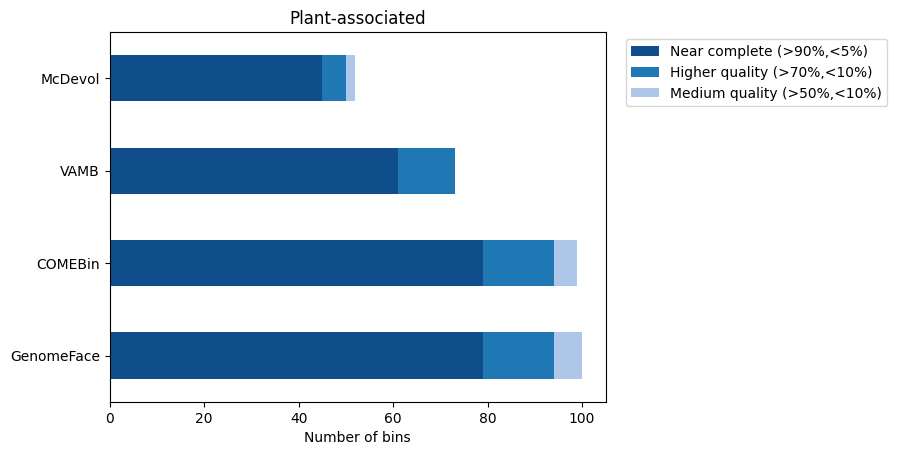

In [186]:
gspl_pooled = gsmags_counts.loc[gsmags_counts['Dataset']=='Plant-associated']

gsplot_data = gspl_pooled[['Near-complete (90%-5%)', 'Higher', 'Medium']]
colors = ['#104e8b', '#1f77b4', '#aec7e8']
gsplot_data.plot.barh(stacked=True, color=colors)
plt.title('Plant-associated')
plt.xlabel('bin counts')
plt.legend(['Near complete (>90%,<5%)','Higher quality (>70%,<10%)', 'Medium quality (>50%,<10%)'], loc=(1.04, 0.8))#'', frameon=False)
plt.xlabel('Number of bins')
plt.ylabel('')
plt.savefig('gspooled_assembly_plant.png', dpi=600, format='png', bbox_inches='tight')

### AMBER assessment

In [191]:
import pandas as pd
import matplotlib.pyplot as plt
colors = ['#104e8b', '#1f77b4', '#aec7e8']

gsmags_counts = pd.read_csv('/home/yazhini/work/binning_benchmarking/goldstandard_pooled_amber.csv', header=0, sep='\t')
gsmags_counts.index = gsmags_counts['Tools']
gsmags_counts = gsmags_counts.iloc[::-1]
gsmags_counts
# Pooled assembly
gsma_pooled = gsmags_counts.loc[gsmags_counts['Dataset']=='Marine']

gsplot_data = gsma_pooled[['Near-complete (90%-5%)', 'Higher', 'Medium']]
colors = ['#104e8b', '#1f77b4', '#aec7e8']
gsplot_data.plot.barh(stacked=True, color=colors)
plt.title('Marine')
plt.xlabel('bin counts')
plt.legend(['Near complete (>90%,<5%)','Higher quality (>70%,<10%)', 'Medium quality (>50%,<10%)'], loc=(1.04, 0.8))#'', frameon=False)
plt.xlabel('Number of bins')
plt.ylabel('')
plt.savefig('amber_gspooled_assembly_marine.png', dpi=600, format='png', bbox_inches='tight')


,Tools,Near-complete (90%-5%),Medium quality (70%-10%),Medium quality (50%-10%),Higher,Medium,Dataset
Tools,,,,,,,
GenomeFace,GenomeFace,83,99,102,16,3,Plant-associated
COMEBin,COMEBin,84,93,100,9,7,Plant-associated
VAMB,VAMB,63,74,75,11,1,Plant-associated
McDevol,McDevol,39,41,41,2,0,Plant-associated
GenomeFace,GenomeFace,33,45,52,12,7,Strain-madness
COMEBin,COMEBin,47,62,70,15,8,Strain-madness
VAMB,VAMB,24,34,36,10,2,Strain-madness
McDevol,McDevol,35,43,43,8,0,Strain-madness
GenomeFace,GenomeFace,310,387,422,77,35,Marine


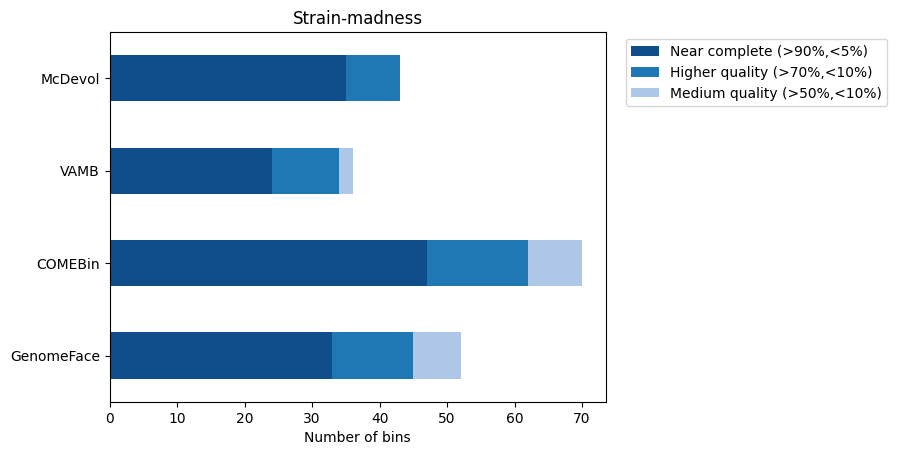

In [189]:
gsss_pooled = gsmags_counts.loc[gsmags_counts['Dataset']=='Strain-madness']

gsplot_data = gsss_pooled[['Near-complete (90%-5%)', 'Higher', 'Medium']]
colors = ['#104e8b', '#1f77b4', '#aec7e8']
gsplot_data.plot.barh(stacked=True, color=colors)
plt.title('Strain-madness')
plt.xlabel('bin counts')
plt.legend(['Near complete (>90%,<5%)','Higher quality (>70%,<10%)', 'Medium quality (>50%,<10%)'], loc=(1.04, 0.8))#'', frameon=False)
plt.xlabel('Number of bins')
plt.ylabel('')
plt.savefig('amber_gspooled_assembly_strain.png', dpi=600, format='png', bbox_inches='tight')

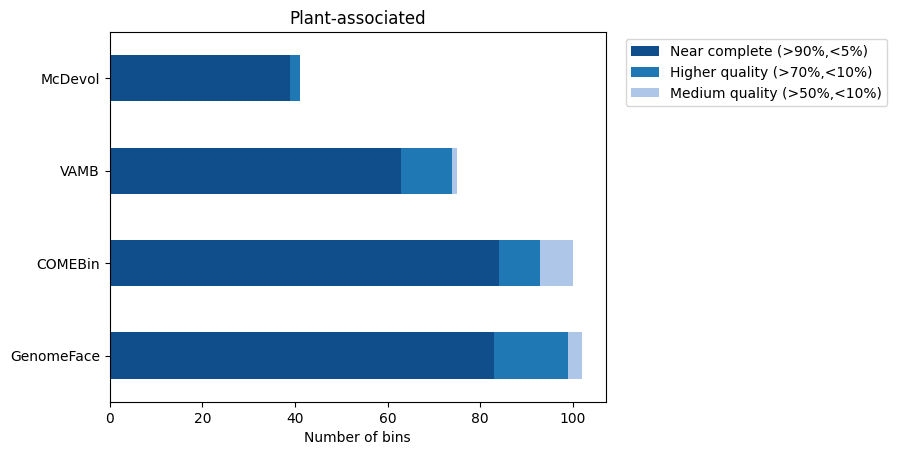

In [190]:
gspl_pooled = gsmags_counts.loc[gsmags_counts['Dataset']=='Plant-associated']

gsplot_data = gspl_pooled[['Near-complete (90%-5%)', 'Higher', 'Medium']]
colors = ['#104e8b', '#1f77b4', '#aec7e8']
gsplot_data.plot.barh(stacked=True, color=colors)
plt.title('Plant-associated')
plt.xlabel('bin counts')
plt.legend(['Near complete (>90%,<5%)','Higher quality (>70%,<10%)', 'Medium quality (>50%,<10%)'], loc=(1.04, 0.8))#'', frameon=False)
plt.xlabel('Number of bins')
plt.ylabel('')
plt.savefig('amber_gspooled_assembly_plant.png', dpi=600, format='png', bbox_inches='tight')

### Time and memory usage (megahit pooled assembly)

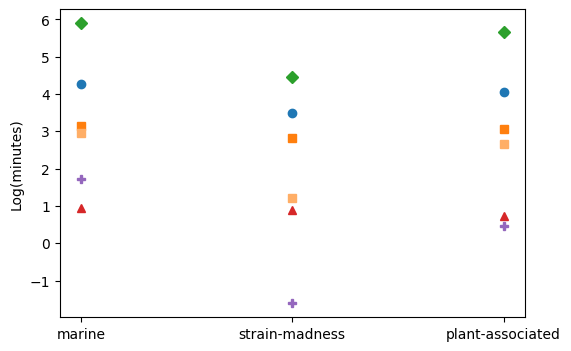

In [273]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

time_memory = pd.read_csv('/home/yazhini/work/binning_benchmarking/time_memory_usage_pooled_plot',  header=0, sep='\t')

tools = time_memory['Tools'].unique()
datasets = time_memory['Datasets'].unique()

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
markers = ['o', 's', 's', 'D', '^', 'P']
colors = ['#1f77b4', '#ff7f0e', '#ffae66', '#2ca02c', '#d62728', '#9467bd']
# Plotting Time Data
for i, tool in enumerate(tools):
    time_data = time_memory[time_memory['Tools'] == tool]['Time (minutes)']
    ax.plot(datasets, np.log(time_data), marker=markers[i], label=tool, color = colors[i], linewidth=0.0)
ax.set_ylabel('Log(minutes)')
plt.savefig('plots/time_requirement_mapooled.png', dpi=600, format='png', bbox_inches='tight')

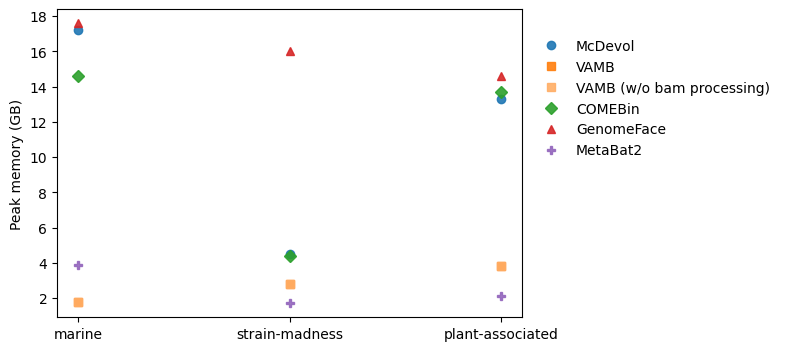

In [274]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
markers = ['o', 's', 's', 'D', '^', 'P']
colors = ['#1f77b4', '#ff7f0e', '#ffae66', '#2ca02c', '#d62728', '#9467bd']
# Plotting Time Data
for i, tool in enumerate(tools):
    memory_data = time_memory[time_memory['Tools'] == tool]['Memory (GB)']
    ax.plot(datasets, memory_data, marker=markers[i], label=tool, color = colors[i], linewidth=0.0, alpha=0.9)
ax.set_ylabel('Peak memory (GB)')
ax.legend(loc=(1.02,0.5),frameon=False)
plt.savefig('plots/memory_requirement_mapooled.png', dpi=600, format='png', bbox_inches='tight')

### Sample-wise assessment AMBER

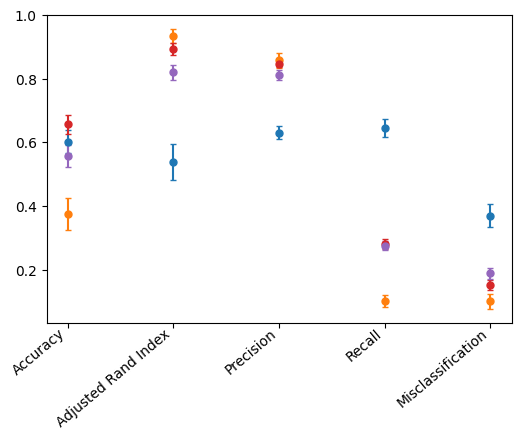

In [332]:
mams_amber = pd.read_csv('/home/yazhini/work/binning_benchmarking/samplewise_mamsamber', header=0, sep='\t')

mams_plotdata = mams_amber[['accuracy_bp','adjusted_rand_index_bp','precision_avg_bp','recall_avg_bp','recall_avg_bp_cami1','misclassification_bp','binning type']]

mams_grouped = mams_plotdata.groupby('binning type').agg(['mean', 'std'])
colors = ['#1f77b4', '#ff7f0e', '#d62728', '#9467bd']
metrics = ['accuracy_bp', 'adjusted_rand_index_bp', 'precision_avg_bp', 'recall_avg_bp', 'misclassification_bp']
# Plotting the error bars
fig, ax = plt.subplots(figsize=(6, 4))
x_labels = ['Accuracy', 'Adjusted Rand Index', 'Precision', 'Recall', 'Misclassification']
x = np.arange(len(metrics))  # the label locations
# Plot for each tool (binning type)
tools = ['McDevol', 'VAMB', 'GenomeFace', 'MetaBat2']
for i, tool in enumerate(tools):
    means = mams_grouped.loc[tool, (metrics, 'mean')].values
    stds = mams_grouped.loc[tool, (metrics, 'std')].values
    ax.errorbar(x, means, yerr=stds, fmt='o', capsize=2, label=tool.capitalize(), color=colors[i], markersize=5)
ax.set_xticks(x)
ax.set_xticklabels(x_labels, rotation=40,ha='right')
ax.tick_params(axis='x', pad=-1)
plt.savefig('plots/msamber_marine.png', dpi=600, format='png', bbox_inches='tight')

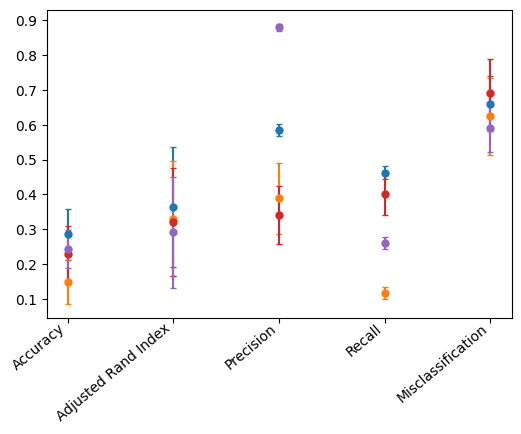

In [334]:
ssms_amber = pd.read_csv('/home/yazhini/work/binning_benchmarking/samplewise_ssmsamber', header=0, sep='\t')

ssms_plotdata = ssms_amber[['accuracy_bp','adjusted_rand_index_bp','precision_avg_bp','recall_avg_bp','recall_avg_bp_cami1','misclassification_bp','binning type']]

ssms_grouped = ssms_plotdata.groupby('binning type').agg(['mean', 'std'])
colors = ['#1f77b4', '#ff7f0e', '#d62728', '#9467bd']
metrics = ['accuracy_bp', 'adjusted_rand_index_bp', 'precision_avg_bp', 'recall_avg_bp', 'misclassification_bp']
# Plotting the error bars
fig, ax = plt.subplots(figsize=(6, 4))
x_labels = ['Accuracy', 'Adjusted Rand Index', 'Precision', 'Recall', 'Misclassification']
x = np.arange(len(metrics))  # the label locations
# Plot for each tool (binning type)
tools = ['McDevol', 'VAMB', 'GenomeFace', 'MetaBat2']
for i, tool in enumerate(tools):
    means = ssms_grouped.loc[tool, (metrics, 'mean')].values
    stds = ssms_grouped.loc[tool, (metrics, 'std')].values
    ax.errorbar(x, means, yerr=stds, fmt='o', capsize=2, label=tool.capitalize(), color=colors[i], markersize=5)
ax.set_xticks(x)
ax.set_xticklabels(x_labels, rotation=40,ha='right')
ax.tick_params(axis='x', pad=-1)
plt.savefig('plots/msamber_strain.png', dpi=600, format='png', bbox_inches='tight')

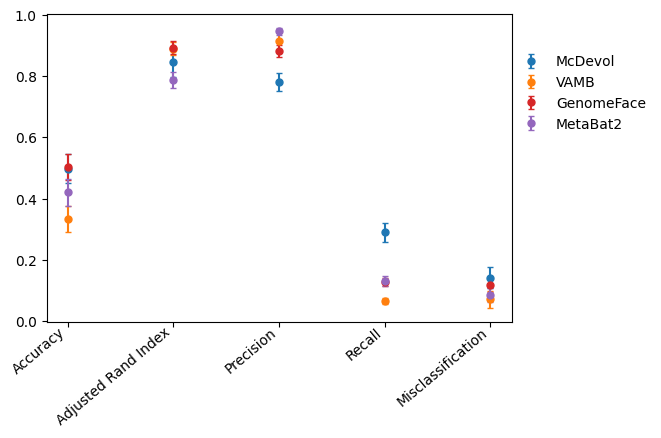

In [372]:
plms_amber = pd.read_csv('/home/yazhini/work/binning_benchmarking/samplewise_plmsamber', header=0, sep='\t')

plms_plotdata = plms_amber[['accuracy_bp','adjusted_rand_index_bp','precision_avg_bp','recall_avg_bp','recall_avg_bp_cami1','misclassification_bp','binning type']]

plms_grouped = plms_plotdata.groupby('binning type').agg(['mean', 'std'])
colors = ['#1f77b4', '#ff7f0e', '#d62728', '#9467bd']
metrics = ['accuracy_bp', 'adjusted_rand_index_bp', 'precision_avg_bp', 'recall_avg_bp', 'misclassification_bp']
# Plotting the error bars
fig, ax = plt.subplots(figsize=(6, 4))
x_labels = ['Accuracy', 'Adjusted Rand Index', 'Precision', 'Recall', 'Misclassification']
x = np.arange(len(metrics))  # the label locations
# Plot for each tool (binning type)
tools = ['McDevol', 'VAMB', 'GenomeFace', 'MetaBat2']
for i, tool in enumerate(tools):
    means = plms_grouped.loc[tool, (metrics, 'mean')].values
    stds = plms_grouped.loc[tool, (metrics, 'std')].values
    ax.errorbar(x, means, yerr=stds, fmt='o', capsize=2, label=tool.capitalize(), color=colors[i], markersize=5)
ax.set_xticks(x)
ax.set_xticklabels(x_labels, rotation=40,ha='right')
ax.tick_params(axis='x', pad=-1)
plt.legend(tools, loc=(1,0.6), frameon=False)
plt.savefig('plots/msamber_plant.png', dpi=600, format='png', bbox_inches='tight')

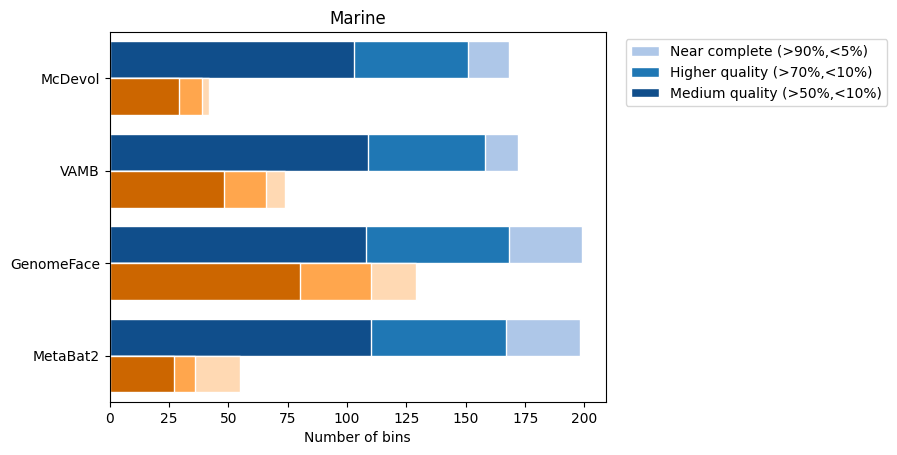

In [364]:
# marine
nonredundant_mags = pd.read_csv('/home/yazhini/work/binning_benchmarking/pooled_vs_multisplitnonredundant', header=0, sep='\t')

mags_counts_ma = nonredundant_mags.loc[nonredundant_mags['Dataset'].str.contains('marine pooled|marine multisplit nr')]
mags_counts_ma.set_index(['Tools', 'Dataset'], inplace=True)
tools_order = mags_counts_ma.index.get_level_values(0).unique()
mags_counts_maplot = mags_counts_ma.reindex(tools_order[::-1], level=0)
mags_counts_maplot = mags_counts_maplot.unstack(level=-1)

tools = ['McDevol', 'VAMB', 'GenomeFace', 'MetaBat2']

fig, ax = plt.subplots()

# Set bar width and gap size
bar_width = 0.4
bar_gap = 0.05  # Gap between the pairs

colors = ['#104e8b', '#1f77b4', '#aec7e8']
colors_ms = ['#cc6600', '#ffa64d', '#ffd9b3']

# Calculate positions for each bar
y_pos = range(len(mags_counts_maplot))
y_pos_shifted = [pos + bar_width + bar_gap for pos in y_pos]  # Shift positions for the second set

# Plot the stacked bar segments for "plant pooled"
(mags_counts_maplot['Near-complete (90%-5%)']['marine pooled'] +
 mags_counts_maplot['Higher']['marine pooled'] +
 mags_counts_maplot['Medium']['marine pooled']).plot(
    kind='barh', color=colors[2], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_maplot['Near-complete (90%-5%)']['marine pooled'] +
mags_counts_maplot['Higher']['marine pooled']).plot(
    kind='barh', color=colors[1], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_maplot['Near-complete (90%-5%)']['marine pooled']).plot(
    kind='barh', color=colors[0], width=bar_width, ax=ax, position=0, edgecolor='white')

# Plot the stacked bar segments for "plant reassembly" with shifted positions
(mags_counts_maplot['Near-complete (90%-5%)']['marine multisplit nr'] +
 mags_counts_maplot['Higher']['marine multisplit nr'] +
 mags_counts_maplot['Medium']['marine multisplit nr']).plot(
    kind='barh', color=colors_ms[2], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_maplot['Near-complete (90%-5%)']['marine multisplit nr'] +
 mags_counts_maplot['Higher']['marine multisplit nr']).plot(
    kind='barh', color=colors_ms[1], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_maplot['Near-complete (90%-5%)']['marine multisplit nr']).plot(
    kind='barh', color=colors_ms[0], width=bar_width, ax=ax, position=1, edgecolor='white')

# Customize plot appearance
plt.legend(['Near complete (>90%,<5%)', 'Higher quality (>70%,<10%)', 'Medium quality (>50%,<10%)'], loc=(1.04, 0.8))
plt.title('Marine')
plt.xlabel('Number of bins')
plt.ylabel('')
plt.ylim(-0.5, 3.5)
# Adjust the layout to ensure all bars are fully visible
# plt.tight_layout(rect=[1, 1, 2, 1.95])  # Adjust the rect parameter to add padding at the top

plt.savefig('plots/pooled_multisplit_nr_marine.png', dpi=600, format='png', bbox_inches='tight')


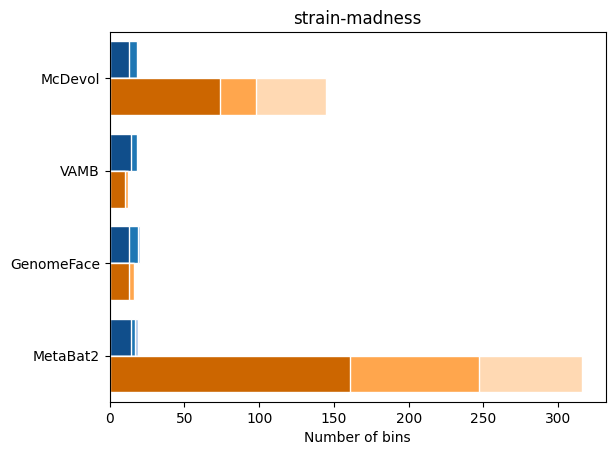

In [366]:
# strain-madness
nonredundant_mags = pd.read_csv('/home/yazhini/work/binning_benchmarking/pooled_vs_multisplitnonredundant', header=0, sep='\t')

mags_counts_ss = nonredundant_mags.loc[nonredundant_mags['Dataset'].str.contains('strain pooled|strain multisplit nr')]
mags_counts_ss.set_index(['Tools', 'Dataset'], inplace=True)
tools_order = mags_counts_ss.index.get_level_values(0).unique()
mags_counts_ssplot = mags_counts_ss.reindex(tools_order[::-1], level=0)
mags_counts_ssplot = mags_counts_ssplot.unstack(level=-1)

tools = ['McDevol', 'VAMB', 'GenomeFace', 'MetaBat2']

fig, ax = plt.subplots()

# Set bar width and gap size
bar_width = 0.4
bar_gap = 0.05  # Gap between the pairs

colors = ['#104e8b', '#1f77b4', '#aec7e8']
colors_ms = ['#cc6600', '#ffa64d', '#ffd9b3']

# Calculate positions for each bar
y_pos = range(len(mags_counts_ssplot))
y_pos_shifted = [pos + bar_width + bar_gap for pos in y_pos]  # Shift positions for the second set

# Plot the stacked bar segments for "plant pooled"
(mags_counts_ssplot['Near-complete (90%-5%)']['strain pooled'] +
 mags_counts_ssplot['Higher']['strain pooled'] +
 mags_counts_ssplot['Medium']['strain pooled']).plot(
    kind='barh', color=colors[2], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_ssplot['Near-complete (90%-5%)']['strain pooled'] +
mags_counts_ssplot['Higher']['strain pooled']).plot(
    kind='barh', color=colors[1], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_ssplot['Near-complete (90%-5%)']['strain pooled']).plot(
    kind='barh', color=colors[0], width=bar_width, ax=ax, position=0, edgecolor='white')

# Plot the stacked bar segments for "plant reassembly" with shifted positions
(mags_counts_ssplot['Near-complete (90%-5%)']['strain multisplit nr'] +
 mags_counts_ssplot['Higher']['strain multisplit nr'] +
 mags_counts_ssplot['Medium']['strain multisplit nr']).plot(
    kind='barh', color=colors_ms[2], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_ssplot['Near-complete (90%-5%)']['strain multisplit nr'] +
 mags_counts_ssplot['Higher']['strain multisplit nr']).plot(
    kind='barh', color=colors_ms[1], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_ssplot['Near-complete (90%-5%)']['strain multisplit nr']).plot(
    kind='barh', color=colors_ms[0], width=bar_width, ax=ax, position=1, edgecolor='white')

# Customize plot appearance
# plt.legend(['Near complete (>90%,<5%)', 'Higher quality (>70%,<10%)', 'Medium quality (>50%,<10%)'], loc=(1.04, 0.8))
plt.title('strain-madness')
plt.xlabel('Number of bins')
plt.ylabel('')
plt.ylim(-0.5, 3.5)
# Adjust the layout to ensure all bars are fully visible
# plt.tight_layout(rect=[1, 1, 2, 1.95])  # Adjust the rect parameter to add padding at the top

plt.savefig('plots/pooled_multisplit_nr_strain.png', dpi=600, format='png', bbox_inches='tight')


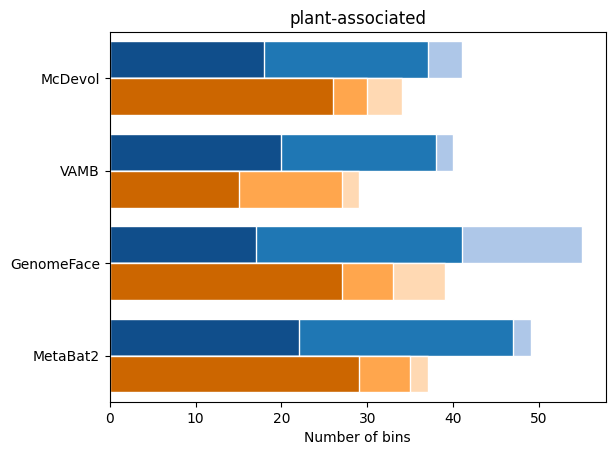

In [368]:
# plant_associated
nonredundant_mags = pd.read_csv('/home/yazhini/work/binning_benchmarking/pooled_vs_multisplitnonredundant', header=0, sep='\t')

mags_counts_pl = nonredundant_mags.loc[nonredundant_mags['Dataset'].str.contains('plant pooled|plant multisplit nr')]
mags_counts_pl.set_index(['Tools', 'Dataset'], inplace=True)
tools_order = mags_counts_pl.index.get_level_values(0).unique()
mags_counts_plplot = mags_counts_pl.reindex(tools_order[::-1], level=0)
mags_counts_plplot = mags_counts_plplot.unstack(level=-1)

tools = ['McDevol', 'VAMB', 'GenomeFace', 'MetaBat2']

fig, ax = plt.subplots()

# Set bar width and gap size
bar_width = 0.4
bar_gap = 0.05  # Gap between the pairs

colors = ['#104e8b', '#1f77b4', '#aec7e8']
colors_ms = ['#cc6600', '#ffa64d', '#ffd9b3']

# Calculate positions for each bar
y_pos = range(len(mags_counts_plplot))
y_pos_shifted = [pos + bar_width + bar_gap for pos in y_pos]  # Shift positions for the second set

# Plot the stacked bar segments for "plant pooled"
(mags_counts_plplot['Near-complete (90%-5%)']['plant pooled'] +
 mags_counts_plplot['Higher']['plant pooled'] +
 mags_counts_plplot['Medium']['plant pooled']).plot(
    kind='barh', color=colors[2], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['plant pooled'] +
mags_counts_plplot['Higher']['plant pooled']).plot(
    kind='barh', color=colors[1], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['plant pooled']).plot(
    kind='barh', color=colors[0], width=bar_width, ax=ax, position=0, edgecolor='white')

# Plot the stacked bar segments for "plant reassembly" with shifted positions
(mags_counts_plplot['Near-complete (90%-5%)']['plant multisplit nr'] +
 mags_counts_plplot['Higher']['plant multisplit nr'] +
 mags_counts_plplot['Medium']['plant multisplit nr']).plot(
    kind='barh', color=colors_ms[2], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['plant multisplit nr'] +
 mags_counts_plplot['Higher']['plant multisplit nr']).plot(
    kind='barh', color=colors_ms[1], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['plant multisplit nr']).plot(
    kind='barh', color=colors_ms[0], width=bar_width, ax=ax, position=1, edgecolor='white')

# Customize plot appearance
# plt.legend(['Near complete (>90%,<5%)', 'Higher quality (>70%,<10%)', 'Medium quality (>50%,<10%)'], loc=(1.04, 0.8))
plt.title('plant-associated')
plt.xlabel('Number of bins')
plt.ylabel('')
plt.ylim(-0.5, 3.5)
# Adjust the layout to ensure all bars are fully visible
# plt.tight_layout(rect=[1, 1, 2, 1.95])  # Adjust the rect parameter to add padding at the top

plt.savefig('plots/pooled_multisplit_nr_plant.png', dpi=600, format='png', bbox_inches='tight')
